In [1]:
import sys
sys.path.append("/Users/shamanthk/Documents/iomics/dowhy-preeclampsia")

In [2]:
import numpy as np
import pandas as pd
from EstimateEffect import *

/Users/shamanthk/.pyenv/versions/3.10.14/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.


In [3]:
df = pd.read_csv('../data/betas_500.csv', index_col=0)
df.index = df.index.str.replace(r'::.*', '', regex=True)
df.columns = df.columns.str.replace(r'::.*', '', regex=True)

df = df.transpose()
df.head()

,ABO,ACADL,ACOT11,ADAMTS14,ADCY4,ADD2,ADORA2B,ADRA1A,ADRA2C,ADRB2,...,ZNF560,ZNF562,ZNF572,ZNF577,ZNF660,ZNF667,ZNF785,ZNF804B,ZSCAN12,ZSCAN16
GSM788417,0.286653,0.100830,0.714489,0.216138,0.463232,0.211398,0.556021,0.375335,0.332831,0.213731,...,0.216980,0.115556,0.382673,0.141096,0.395113,0.169859,0.554643,0.260140,0.153931,0.155679
GSM788419,0.279650,0.087703,0.713941,0.186465,0.485031,0.201391,0.620715,0.361520,0.327508,0.086909,...,0.217710,0.078361,0.358216,0.143691,0.394575,0.153465,0.545284,0.221913,0.144950,0.119980
GSM788420,0.268227,0.081340,0.714192,0.195455,0.461802,0.210969,0.545269,0.364272,0.312898,0.170258,...,0.196714,0.093258,0.367346,0.140717,0.402525,0.159516,0.564620,0.201813,0.142980,0.124261
GSM788421,0.267576,0.080080,0.711066,0.188846,0.433606,0.208251,0.617009,0.380944,0.289887,0.108919,...,0.184075,0.072457,0.385657,0.141546,0.409713,0.145243,0.549677,0.247063,0.144411,0.129721
GSM788414,0.265860,0.078628,0.715149,0.164783,0.435845,0.212740,0.615782,0.363593,0.291139,0.176433,...,0.208951,0.061186,0.358398,0.140577,0.360815,0.126509,0.499693,0.222571,0.148082,0.121801


In [4]:
df.shape

In [5]:
EstimationModel = EstimateEffect(df)

In [6]:
causal_graph = EstimationModel.find_causal_graph(algo='CCDr')

disp_graph_nx(causal_graph)

KeyboardInterrupt: 

In [9]:
from cdt.utils.graph import dagify_min_edge

causal_graph = dagify_min_edge(causal_graph)
EstimationModel.graph = causal_graph

In [10]:
nx.is_directed_acyclic_graph(causal_graph)

True

In [11]:
df.columns

Index(['ZNF471', 'ZNF474', 'ZNF48', 'ZNF485', 'ZNF491', 'ZNF493', 'ZNF496',
       'ZNF498', 'ZNF501', 'ZNF503',
       ...
       'ZSCAN16', 'ZSCAN18', 'ZSCAN2', 'ZSCAN22', 'ZUFSP', 'ZW10', 'ZWINT',
       'ZYX', 'ZZEF1', 'ZZZ3'],
      dtype='object', length=134)

Test permutations of given graph: 100%|██████████| 15/15 [29:58<00:00, 119.91s/it]


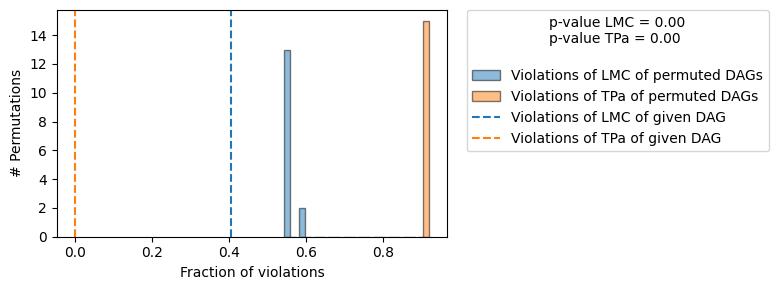

In [13]:
EstimationModel.refute_cgm(show_plt=True, n_perm=15)

In [14]:
EstimationModel.create_model(treatment='ABO', outcome='ADRA2C')

In [15]:
EstimationModel.identify_effect()

KeyboardInterrupt: 

In [ ]:
EstimationModel.estimate_effect()

In [ ]:
EstimationModel.refute_estimate()

In [ ]:
EstimationModel.get_all_information()